# Import statements
Following packages are necessary:

In [1]:
import random
import utils
import os
import imageio
import json
from simplegen import SIMPLESequence

import tensorflow as tf
import numpy as np
import tensorflow.keras.backend as kb
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint

from unet import UNet
from unet import preprocess_input as pre_une

from matplotlib import pyplot as plt

# Checks
The version of tensorflow as well as the GPU support are checked.

In [2]:
print(tf.__version__)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.get_visible_devices('GPU')

2.0.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Functionality
Necessary funcionality is added here

In [3]:
def plot_cube(img, x, y, val):
    
    img[y][x] = val
    img[y][x-1] = val
    img[y][x+1] = val
    img[y-1][x] = val
    img[y-1][x-1] = val
    img[y-1][x+1] = val
    img[y+1][x] = val
    img[y+1][x-1] = val
    img[y+1][x+1] = val  

# 6.7) Supervised Euclidean for SIMPLED with mean absolute error
A U-Net is trained here to predict a displacement field and the euclidean distance is taken as error.

# Data
Import training images

In [4]:
store_path = 'experiments/6_7_euclidean'

path_fixed = r'D:\Julian\data\SIMPLED\train\0_f.json'
path_train = r'D:\Julian\data\SIMPLED\train'
path_validation = r'D:\Julian\data\SIMPLED\validation'
path_test = r'D:\Julian\data\SIMPLED\test'

width = 224
height = 224

# Seeding
Seeds are set to ensure reproducible training.

In [5]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [6]:
model = UNet(filters=32, layers=4, activation='linear', classes=2, input_shape=(224, 224, 1))

# Training Preparation
Prepare the settings for training the model.

In [7]:
train_gen = SIMPLESequence(path_train, path_fixed,
                           batch_size=4,
                           preprocess_input=pre_une,
                           shuffle=True)

validation_gen = SIMPLESequence(path_validation, path_fixed,
                                batch_size=4,
                                preprocess_input=pre_une)

logger = CSVLogger(store_path + "/log")
checker = ModelCheckpoint(store_path + "/weights.{epoch:02d}.hdf5",
                          period=10)
callbacks = [logger, checker]

model.compile(optimizer='adam', loss = utils.maed_loss, metrics=[utils.msed_loss])

# Training
Run the training.

In [8]:
model.fit(train_gen,
          epochs=100,
          callbacks=callbacks,
          validation_data=validation_gen,
          validation_freq=1,
          #use_multiprocessing=True,
          workers=10,
          max_queue_size=32)

Train for 840 steps, validate for 180 steps
Epoch 1/100


C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shap

840/840 [==============================] - 72s 85ms/step - loss: 22.1578 - msed_loss: 802.7303 - val_loss: 19.0015 - val_msed_loss: 625.3784
Epoch 2/100
840/840 [==============================] - 59s 71ms/step - loss: 19.0666 - msed_loss: 620.2186 - val_loss: 18.6294 - val_msed_loss: 608.8632
Epoch 3/100
840/840 [==============================] - 61s 72ms/step - loss: 18.8076 - msed_loss: 607.3517 - val_loss: 18.8699 - val_msed_loss: 617.7592
Epoch 4/100
840/840 [==============================] - 63s 74ms/step - loss: 18.0962 - msed_loss: 566.2931 - val_loss: 33.6484 - val_msed_loss: 1554.4106
Epoch 5/100
840/840 [==============================] - 62s 73ms/step - loss: 11.4744 - msed_loss: 238.0677 - val_loss: 8.1481 - val_msed_loss: 120.9752
Epoch 6/100
840/840 [==============================] - 62s 73ms/step - loss: 6.8696 - msed_loss: 83.8668 - val_loss: 6.4025 - val_msed_loss: 80.8529
Epoch 7/100
840/840 [==============================] - 62s 74ms/step - loss: 5.6748 - msed_loss: 5

Epoch 56/100
840/840 [==============================] - 60s 72ms/step - loss: 0.6393 - msed_loss: 1.0767 - val_loss: 2.2199 - val_msed_loss: 24.9587
Epoch 57/100
840/840 [==============================] - 60s 71ms/step - loss: 0.6336 - msed_loss: 1.0948 - val_loss: 2.2767 - val_msed_loss: 24.9610
Epoch 58/100
840/840 [==============================] - 60s 71ms/step - loss: 0.6367 - msed_loss: 1.0299 - val_loss: 2.1362 - val_msed_loss: 24.5196
Epoch 59/100
840/840 [==============================] - 61s 72ms/step - loss: 0.6231 - msed_loss: 0.9529 - val_loss: 2.2220 - val_msed_loss: 26.1294
Epoch 60/100
840/840 [==============================] - 60s 72ms/step - loss: 0.6155 - msed_loss: 0.9658 - val_loss: 2.1601 - val_msed_loss: 25.3092
Epoch 61/100
840/840 [==============================] - 59s 71ms/step - loss: 0.5988 - msed_loss: 0.9663 - val_loss: 2.3024 - val_msed_loss: 26.2694
Epoch 62/100
840/840 [==============================] - 60s 71ms/step - loss: 0.5787 - msed_loss: 0.9597 -

# Evaluation
Evaluate the trained network

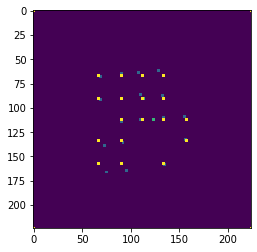

In [9]:
X, y = validation_gen[1]

y_pred = model.predict(X)

u_x = y_pred[0,:,:,0]
u_y = y_pred[0,:,:,1]

plt.imshow(y_pred[0,:,:,0], cmap="gray")

plt.imsave(store_path + "/u_x.png", u_x, cmap="gray")
plt.imsave(store_path + "/u_y.png", u_y, cmap="gray")

u_x.dump(store_path + "/u_x")
u_y.dump(store_path + "/u_y")

warp = np.zeros((width, height))

for index in range(0,25):
    x_pos = int(y[0, index, 0, 0])
    y_pos = int(y[0, index, 1, 0])
    
    plot_cube(warp, x_pos, y_pos, 1) #blue
    
    ux_field = y_pred[0,:,:,0]
    uy_field = y_pred[0,:,:,1]
    
    ux = ux_field[y_pos][x_pos]
    uy = uy_field[y_pos][x_pos]
    
    x_pos = int(round(x_pos + ux))
    y_pos = int(round(y_pos + uy))
            
    plot_cube(warp, x_pos, y_pos, 2) #green    
    
    x_pos = int(y[0, index, 0, 1])
    y_pos = int(y[0, index, 1, 1])
    
    plot_cube(warp, x_pos, y_pos, 3) #yellow    
    
plt.imshow(warp)
plt.imsave(store_path + "/warp.png", warp)